# US Accidents Exploratory Data Analysis (2016 - 2023)

In [1]:
# https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?resource=download

### Data Preparation and Cleaning

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('US_Accidents_March23.csv')

In [5]:
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

### Percentage of missing values per column

In [9]:
missing_percentage = df.isna().sum().sort_values(ascending=False)/ len(df)
missing_percentage

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [10]:
type(missing_percentage)

pandas.core.series.Series

In [11]:
missing_percentage[missing_percentage != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

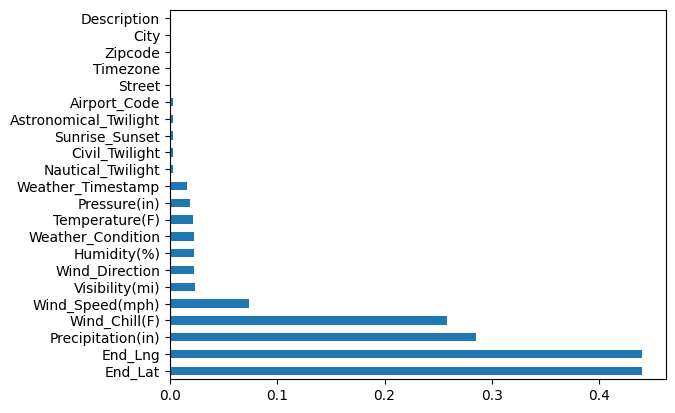

In [12]:
missing_percentage[missing_percentage != 0].plot(kind = 'barh')

# Exploratory Analysis and Visualization

## Columns to analyze:

## 1. City

In [13]:
cities = df.City.unique()
len(cities)

13679

In [14]:
df.City.value_counts()

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [15]:
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

### Visualization of Top 20 cities by Accidents

<Axes: ylabel='City'>

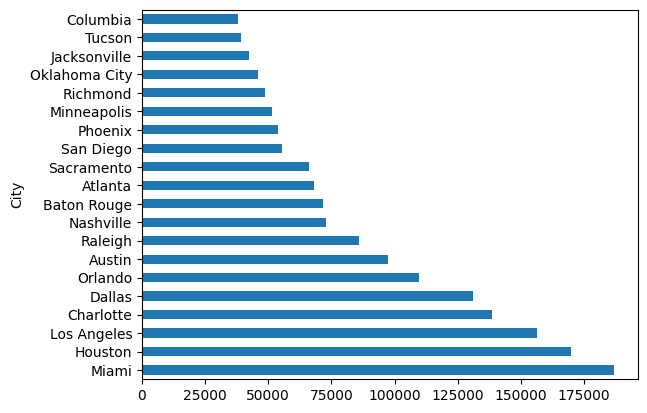

In [16]:
cities_by_accident[:20].plot(kind='barh')

In [17]:
import seaborn as sns
sns.set_style("darkgrid")

### Less than 9% of cities have more than 1000 yearly accidents.

In [18]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]


In [19]:
len(high_accident_cities)

1218

In [20]:
len(high_accident_cities)/len(cities_by_accident)

0.08904810644831115

### New York City is the most populous city in the US, yet it ranks 45th on the list of cities with the most accidents. Why is this the case?

In [21]:
 cities_by_accident['New York']

21699

In [22]:
cities_by_accident[:45]

City
Miami              186917
Houston            169609
Los Angeles        156491
Charlotte          138652
Dallas             130939
Orlando            109733
Austin              97359
Raleigh             86079
Nashville           72930
Baton Rouge         71588
Atlanta             68186
Sacramento          66264
San Diego           55504
Phoenix             53974
Minneapolis         51488
Richmond            48845
Oklahoma City       46092
Jacksonville        42447
Tucson              39304
Columbia            38178
San Antonio         37961
Greenville          37802
Saint Paul          37383
Seattle             36564
Portland            35399
San Jose            34536
Indianapolis        33219
Chicago             32035
Tampa               31193
Denver              30557
Kansas City         30107
Tulsa               28880
Riverside           27410
New Orleans         27354
Bronx               27297
Rochester           26866
Fort Lauderdale     26205
Detroit             24865
Grand R

## 2. Accident Peak Timings

In [23]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [24]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

#### Accident Peak Times Over a 24-Hour Period

C:\Users\navne\AppData\Local\Temp\ipykernel_5408\362819596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

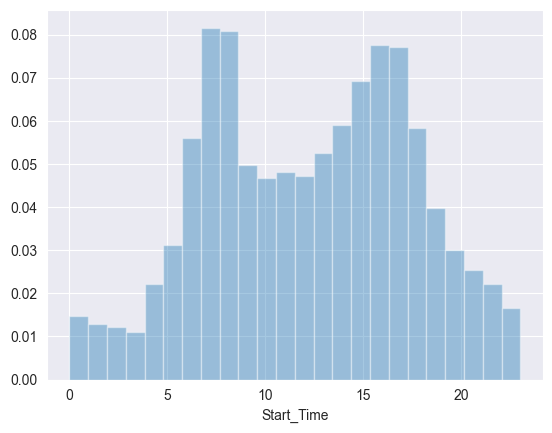

In [25]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

#### Peak Accident Days Over a One-Week Period

C:\Users\navne\AppData\Local\Temp\ipykernel_5408\308908771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

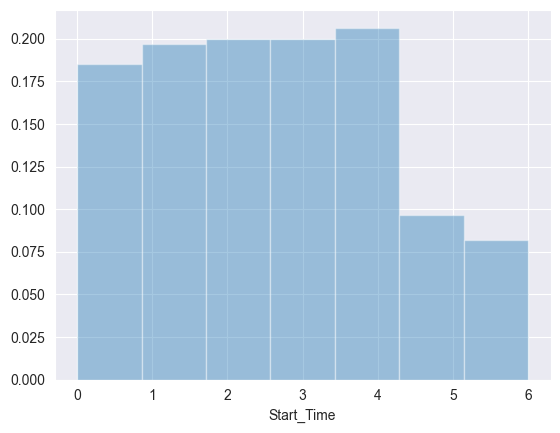

In [26]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

### Accident Peak Times During Weekend Period

C:\Users\navne\AppData\Local\Temp\ipykernel_5408\2254416291.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

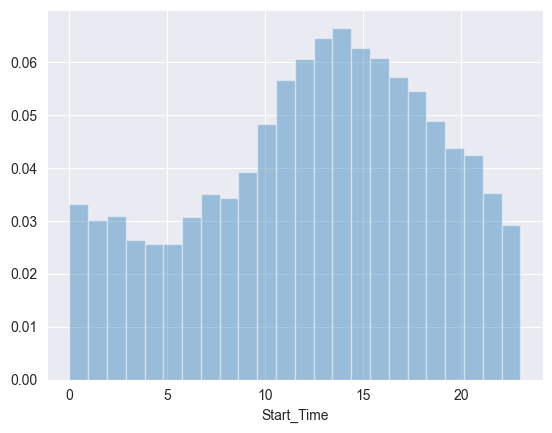

In [27]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

C:\Users\navne\AppData\Local\Temp\ipykernel_5408\1614742184.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saturday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

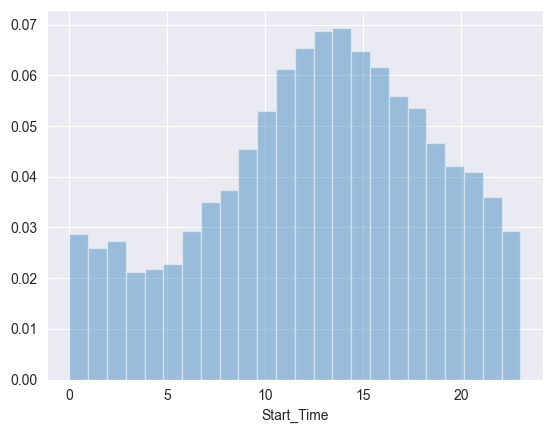

In [28]:
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==5]
sns.distplot(saturday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

C:\Users\navne\AppData\Local\Temp\ipykernel_5408\4268565558.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

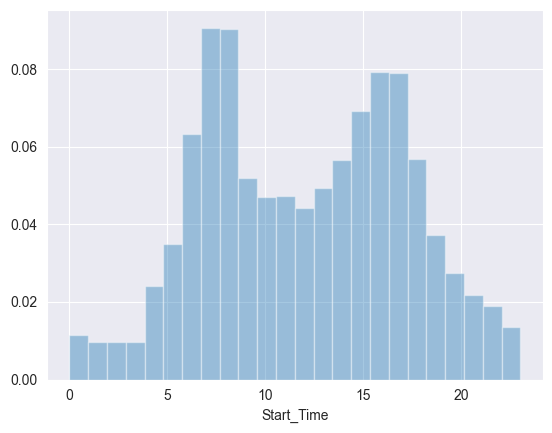

In [29]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

## 3. Identifying accident-prone areas using latitude and longitude data

In [30]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [31]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [32]:
sample_df = df.sample(int(0.1* len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

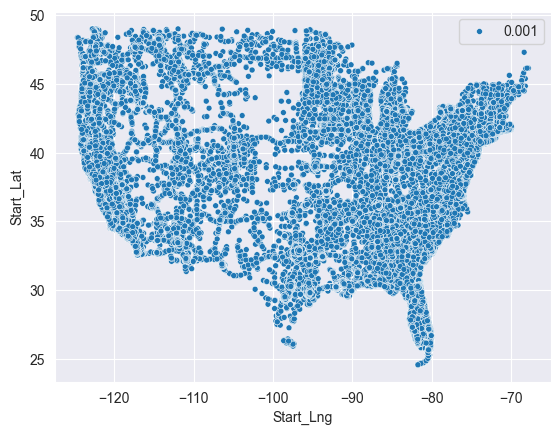

In [33]:
sns.scatterplot(x=sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001)

In [34]:
import folium

In [35]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [37]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [38]:
from folium.plugins import HeatMap

### Heat map highlighting accident-prone areas

In [39]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [40]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## 4. Likelihood of road accidents caused by adverse weather conditions

In [41]:
df.Weather_Condition 

0             Light Rain
1             Light Rain
2               Overcast
3          Mostly Cloudy
4          Mostly Cloudy
               ...      
7728389             Fair
7728390             Fair
7728391    Partly Cloudy
7728392             Fair
7728393             Fair
Name: Weather_Condition, Length: 7728394, dtype: object

In [42]:
weather = df.Weather_Condition.unique()
len(weather)

145

In [43]:
weather_by_accident = df.Weather_Condition.value_counts()
weather_by_accident

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

#### Including ideal weather conditions

<Axes: ylabel='Weather_Condition'>

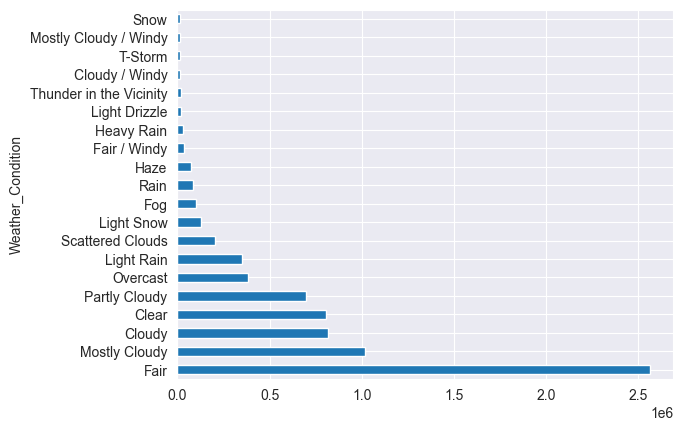

In [44]:
weather_by_accident[0:20].plot(kind='barh')

#### Excluding ideal weather conditions

<Axes: ylabel='Weather_Condition'>

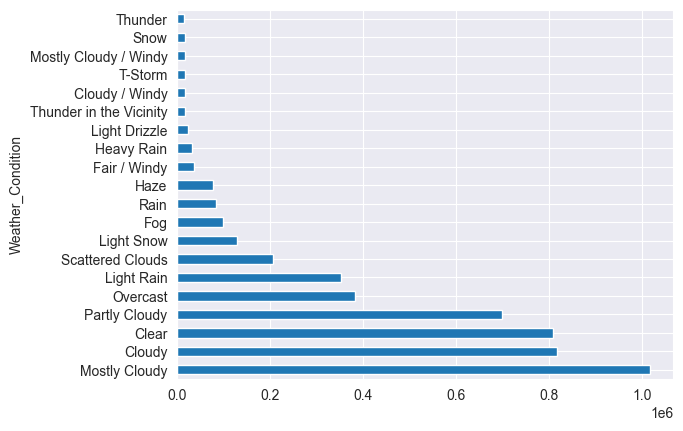

In [45]:
weather_by_accident[1:21].plot(kind='barh')

## 5. Temperature

In [51]:
df = df.rename(columns = {'Temperature(F)': 'Temperature'})

In [52]:
df.Temperature

0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
           ... 
7728389    86.0
7728390    70.0
7728391    73.0
7728392    71.0
7728393    79.0
Name: Temperature, Length: 7728394, dtype: float64

In [55]:
Temperature_count = df.Temperature.unique()
len(Temperature_count)

861

In [64]:
Temperature_values = df.Temperature.value_counts()
Temperature_values.head(20)

Temperature
77.0    170991
73.0    170898
68.0    163767
72.0    160498
75.0    158448
70.0    155568
63.0    149787
59.0    149017
64.0    148466
79.0    147140
66.0    144854
61.0    140366
57.0    134818
81.0    132517
50.0    132335
54.0    129882
82.0    126838
55.0    125909
52.0    116664
84.0    105573
Name: count, dtype: int64